# 1. vaex

In [1]:
import vaex
import numpy as np
import matplotlib.pylab as plt

## 1.1 Open and read

### From array

In [2]:
x = np.arange(5)
y = x**2
vaex.from_arrays(x=x, y=y)

#,x,y
0,0,0
1,1,1
2,2,4
3,3,9
4,4,16


### From cloud

In [3]:
# Read in the NYC Taxi dataset straight from S3
nyctaxi = vaex.open('s3://vaex/taxi/yellow_taxi_2009_2015_f32.hdf5?anon=true')
nyctaxi.head(5)

#,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,payment_type,trip_distance,pickup_longitude,pickup_latitude,rate_code,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,VTS,2009-01-04 02:52:00.000000000,2009-01-04 03:02:00.000000000,1,CASH,2.63,-73.992,40.7216,nan,nan,-73.9938,40.6959,8.9,0.5,nan,0,0,9.4
1,VTS,2009-01-04 03:31:00.000000000,2009-01-04 03:38:00.000000000,3,Credit,4.55,-73.9821,40.7363,nan,nan,-73.9558,40.768,12.1,0.5,nan,2,0,14.6
2,VTS,2009-01-03 15:43:00.000000000,2009-01-03 15:57:00.000000000,5,Credit,10.35,-74.0026,40.7397,nan,nan,-73.87,40.7702,23.7,0,nan,4.74,0,28.44
3,DDS,2009-01-01 20:52:58.000000000,2009-01-01 21:14:00.000000000,1,CREDIT,5,-73.9743,40.791,nan,nan,-73.9966,40.7318,14.9,0.5,nan,3.05,0,18.45
4,DDS,2009-01-24 16:18:23.000000000,2009-01-24 16:24:56.000000000,1,CASH,0.4,-74.0016,40.7194,nan,nan,-74.0084,40.7203,3.7,0,nan,0,0,3.7


### From example

In [4]:
df = vaex.example()
df

#,id,x,y,z,vx,vy,vz,E,L,Lz,FeH
0,0,1.2318683862686157,-0.39692866802215576,-0.598057746887207,301.1552734375,174.05947875976562,27.42754554748535,-149431.40625,407.38897705078125,333.9555358886719,-1.0053852796554565
1,23,-0.16370061039924622,3.654221296310425,-0.25490644574165344,-195.00022888183594,170.47216796875,142.5302276611328,-124247.953125,890.2411499023438,684.6676025390625,-1.7086670398712158
2,32,-2.120255947113037,3.326052665710449,1.7078403234481812,-48.63423156738281,171.6472930908203,-2.079437255859375,-138500.546875,372.2410888671875,-202.17617797851562,-1.8336141109466553
3,8,4.7155890464782715,4.5852508544921875,2.2515437602996826,-232.42083740234375,-294.850830078125,62.85865020751953,-60037.0390625,1297.63037109375,-324.6875,-1.4786882400512695
4,16,7.21718692779541,11.99471664428711,-1.064562201499939,-1.6891745328903198,181.329345703125,-11.333610534667969,-83206.84375,1332.7989501953125,1328.948974609375,-1.8570483922958374
...,...,...,...,...,...,...,...,...,...,...,...
"329,995",21,1.9938701391220093,0.789276123046875,0.22205990552902222,-216.92990112304688,16.124420166015625,-211.244384765625,-146457.4375,457.72247314453125,203.36758422851562,-1.7451677322387695
"329,996",25,3.7180912494659424,0.721337616443634,1.6415337324142456,-185.92160034179688,-117.25082397460938,-105.4986572265625,-126627.109375,335.0025634765625,-301.8370056152344,-0.9822322130203247
"329,997",14,0.3688507676124573,13.029608726501465,-3.633934736251831,-53.677146911621094,-145.15771484375,76.70909881591797,-84912.2578125,817.1375732421875,645.8507080078125,-1.7645612955093384
"329,998",18,-0.11259264498949051,1.4529125690460205,2.168952703475952,179.30865478515625,205.79710388183594,-68.75872802734375,-133498.46875,724.000244140625,-283.6910400390625,-1.8808952569961548


## 1.2 DataFrame

### Columns as expressions

In [5]:
df.x

Expression = x
Length: 330,000 dtype: float32 (column)
---------------------------------------
     0    1.23187
     1  -0.163701
     2   -2.12026
     3    4.71559
     4    7.21719
       ...       
329995    1.99387
329996    3.71809
329997   0.368851
329998  -0.112593
329999    20.7962

In [6]:
df.x.values

array([ 1.2318684 , -0.16370061, -2.120256  , ...,  0.36885077,
       -0.11259264, 20.79622   ], dtype=float32)

In [7]:
import numpy as np 
np.sqrt(df.x**2 + df.y**2 + df.z**2)

Expression = sqrt((((x ** 2) + (y ** 2)) + (z ** 2)))
Length: 330,000 dtype: float32 (expression)
-------------------------------------------
     0  1.42574
     1  3.66676
     2  4.29824
     3  6.95203
     4   14.039
      ...      
329995  2.15587
329996  4.12785
329997  13.5319
329998  2.61304
329999  24.3339

### Assign virtual columns

In [8]:
df['r'] = np.sqrt(df.x**2 + df.y**2 + df.z**2)
df[['x', 'y', 'z', 'r']]

#,x,y,z,r
0,1.2318683862686157,-0.39692866802215576,-0.598057746887207,1.425736665725708
1,-0.16370061039924622,3.654221296310425,-0.25490644574165344,3.666757345199585
2,-2.120255947113037,3.326052665710449,1.7078403234481812,4.298235893249512
3,4.7155890464782715,4.5852508544921875,2.2515437602996826,6.952032566070557
4,7.21718692779541,11.99471664428711,-1.064562201499939,14.03902816772461
...,...,...,...,...
"329,995",1.9938701391220093,0.789276123046875,0.22205990552902222,2.155872344970703
"329,996",3.7180912494659424,0.721337616443634,1.6415337324142456,4.127851963043213
"329,997",0.3688507676124573,13.029608726501465,-3.633934736251831,13.531896591186523
"329,998",-0.11259264498949051,1.4529125690460205,2.168952703475952,2.613041877746582


### JIT compilation

In [9]:
df['r_jit'] = np.sqrt(df.x**2 + df.y**2).jit_numba()

### Materialize

In [10]:
df_m = df.materialize('r')

In [11]:
%%timeit -n3 -r10
df_m.mean(df.r)

7.15 ms ± 1.28 ms per loop (mean ± std. dev. of 10 runs, 3 loops each)


### Selecting and filtering

In [12]:
df.select(df.x < 0)
df.evaluate(df.x, selection = True)

array([-0.16370061, -2.120256  , -7.7843747 , ..., -8.126636  ,
       -3.9477386 , -0.11259264], dtype=float32)

In [13]:
df_negative = df[df.x < 0]
df_negative[['x', 'y', 'z', 'r']]

#,x,y,z,r
0,-0.16370061039924622,3.654221296310425,-0.25490644574165344,3.666757345199585
1,-2.120255947113037,3.326052665710449,1.7078403234481812,4.298235893249512
2,-7.784374713897705,5.989774703979492,-0.682695209980011,9.845809936523438
3,-3.5571861267089844,5.413629055023193,0.09171556681394577,6.478376865386963
4,-20.813940048217773,-3.294677495956421,13.486607551574707,25.019264221191406
...,...,...,...,...
"166,274",-2.5926425457000732,-2.871671676635742,-0.18048334121704102,3.8730955123901367
"166,275",-0.7566012144088745,2.9830434322357178,-6.940553188323975,7.592250823974609
"166,276",-8.126635551452637,1.1619765758514404,-1.6459038257598877,8.372657775878906
"166,277",-3.9477386474609375,-3.0684902667999268,-1.5822702646255493,5.244411468505859


### Statistics

In [14]:
df.count(), df.mean(df.x), df.mean(df.x, selection = True)

(array(330000), array(-0.0632868), array(-5.18457762))

In [15]:
counts_x = df.count(binby=df.x, limits=[-10, 10], shape=64)
counts_x

array([1374, 1350, 1459, 1618, 1706, 1762, 1852, 2007, 2240, 2340, 2610,
       2840, 3126, 3337, 3570, 3812, 4216, 4434, 4730, 4975, 5332, 5800,
       6162, 6540, 6805, 7261, 7478, 7642, 7839, 8336, 8736, 8279, 8269,
       8824, 8217, 7978, 7541, 7383, 7116, 6836, 6447, 6220, 5864, 5408,
       4881, 4681, 4337, 4015, 3799, 3531, 3320, 3040, 2866, 2629, 2488,
       2244, 1981, 1905, 1734, 1540, 1437, 1378, 1233, 1186])

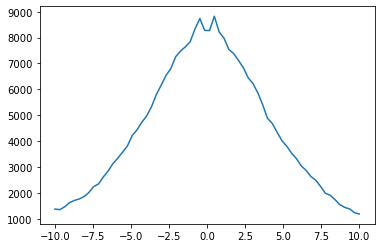

In [16]:
plt.plot(np.linspace(-10, 10, 64), counts_x)
plt.show()

In [17]:
xycounts = df.count(binby=[df.x, df.y], limits=[[-10, 10], [-10, 20]], shape=(64, 128))
xycounts

array([[ 5,  2,  3, ...,  3,  3,  0],
       [ 8,  4,  2, ...,  5,  3,  2],
       [ 5, 11,  7, ...,  3,  3,  1],
       ...,
       [ 4,  8,  5, ...,  2,  0,  2],
       [10,  6,  7, ...,  1,  1,  2],
       [ 6,  7,  9, ...,  2,  2,  2]])

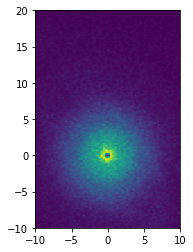

In [18]:
plt.imshow(xycounts.T, origin='lower', extent=[-10, 10, -10, 20])
plt.show()

In [19]:
v = np.sqrt(df.vx**2 + df.vy**2 + df.vz**2)
xy_mean_v = df.mean(v, binby=[df.x, df.y], limits=[[-10, 10], [-10, 20]], shape=(64, 128))
xy_mean_v

array([[156.15283203, 226.0004425 , 206.95940653, ...,  90.0340627 ,
        152.08784485,          nan],
       [203.81366634, 133.01436043, 146.95962524, ..., 137.54756927,
         98.68717448, 141.06020737],
       [150.59178772, 188.38820371, 137.46753802, ..., 155.96900177,
        148.91660563, 138.48191833],
       ...,
       [168.93819809, 187.75943136, 137.318647  , ..., 144.83927917,
                 nan, 107.7273407 ],
       [154.80492783, 140.55182203, 180.30700166, ..., 184.01670837,
         95.10913086, 131.18122864],
       [166.06868235, 150.54079764, 125.84606828, ..., 130.56007385,
        121.04217911, 113.34659195]])

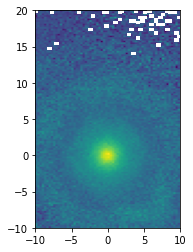

In [20]:
plt.imshow(xy_mean_v.T, origin='lower', extent=[-10, 10, -10, 20])
plt.show()

### Missing values

In [21]:
df_fillna_0 = df.fillna(value=0, column_names=['x'])
df_fillna_3 = df.fillna(value=3, column_names=['x'])
df_fillna_5 = df.fillna(value=5, column_names=['x'])

### xarray

In [22]:
xarr = df.count(binby=[df.x, df.y], limits=[-10, 10], shape=64, array_type='xarray')
xarr

<xarray.DataArray (x: 64, y: 64)>
array([[ 6,  3,  7, ..., 15, 10, 11],
       [10,  3,  7, ..., 10, 13, 11],
       [ 5, 15,  5, ..., 12, 18, 12],
       ...,
       [ 7,  8, 10, ...,  6,  7,  7],
       [12, 10, 17, ..., 11,  8,  2],
       [ 7, 10, 13, ...,  6,  5,  7]])
Coordinates:
  * x        (x) float64 -9.844 -9.531 -9.219 -8.906 ... 8.906 9.219 9.531 9.844
  * y        (y) float64 -9.844 -9.531 -9.219 -8.906 ... 8.906 9.219 9.531 9.844

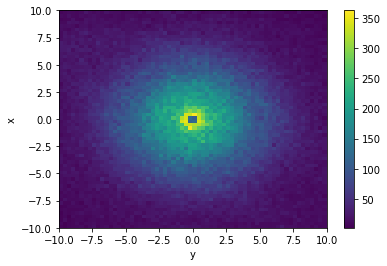

In [23]:
xarr.plot()

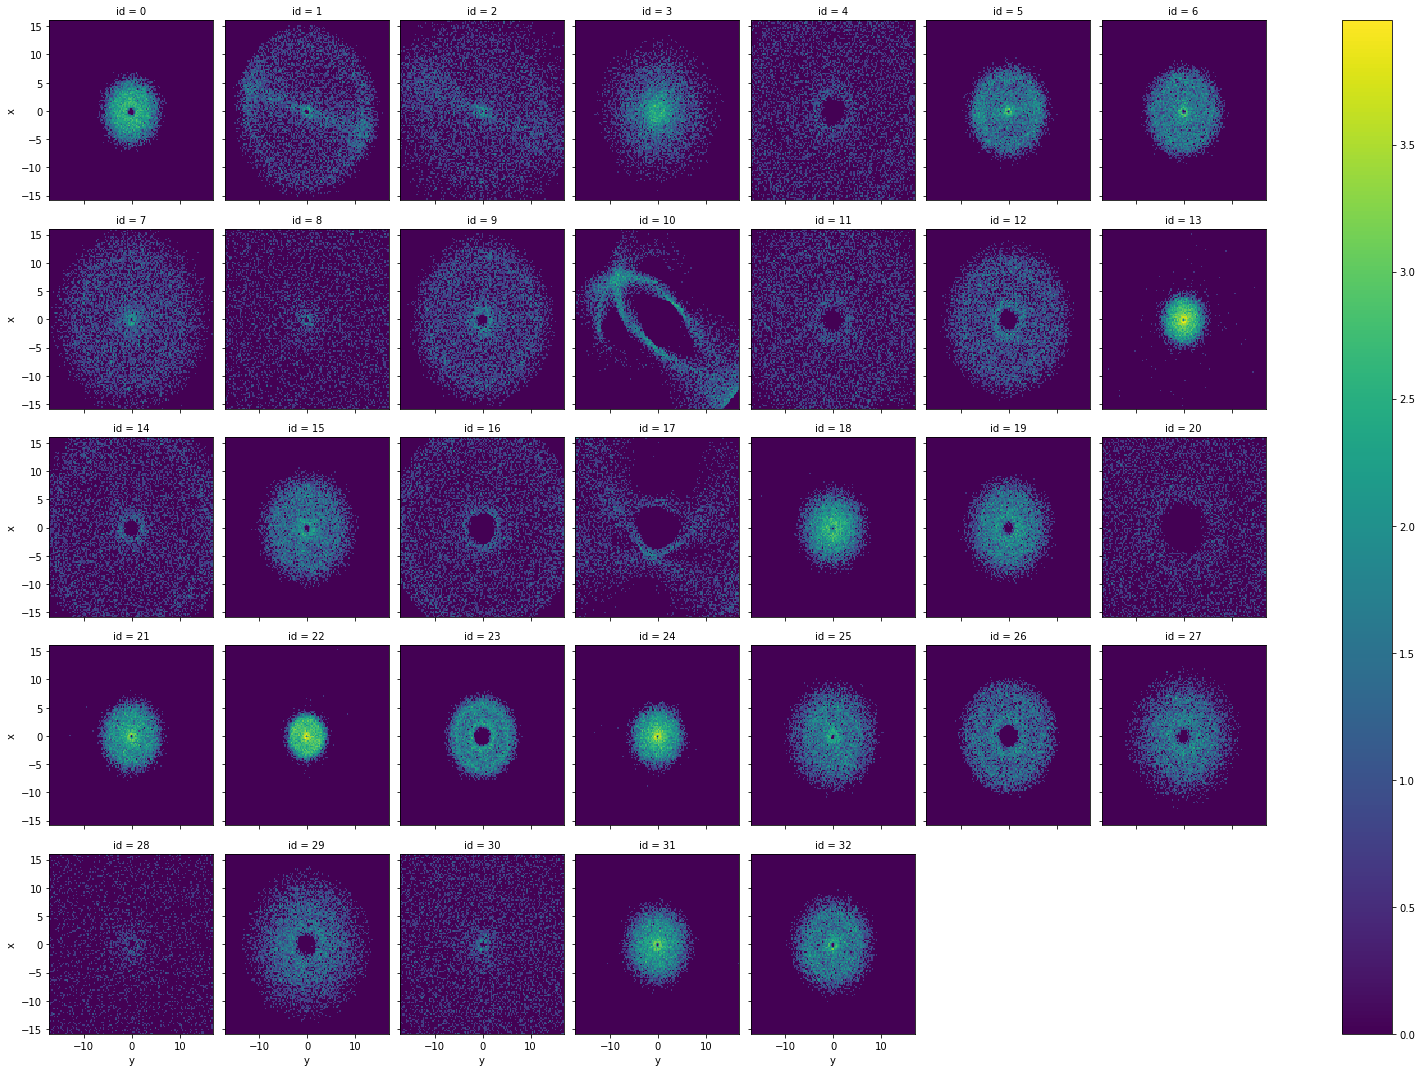

In [24]:
df.categorize('id', inplace = True)
xarr = df.count(binby = ['x','y','id'],
                limits = '95%',
                array_type = 'xarray')
np.log1p(xarr).plot(col = 'id', col_wrap = 7)

### Join

In [25]:
a = np.array(['a', 'b', 'c'])
x = np.arange(1,4)
df1 = vaex.from_arrays(a=a, x=x)
df1

#,a,x
0,a,1
1,b,2
2,c,3


In [26]:
b = np.array(['a', 'b', 'd'])
y = x**2
df2 = vaex.from_arrays(b=b, y=y)
df2

#,b,y
0,a,1
1,b,4
2,d,9


In [27]:
df1.join(df2, how = 'left', left_on = 'a', right_on = 'b')

#,a,x,b,y
0,a,1,a,1
1,b,2,b,4
2,c,3,--,--


### GroupBy

In [28]:
animal = ['dog', 'dog', 'cat', 'guinea pig', 'guinea pig', 'dog']
age = [2, 1, 5, 1, 3, 7]
cuteness = [9, 10, 5, 8, 4, 8]
df_pets = vaex.from_arrays(animal = animal, age = age, cuteness = cuteness)
df_pets

#,animal,age,cuteness
0,dog,2,9
1,dog,1,10
2,cat,5,5
3,guinea pig,1,8
4,guinea pig,3,4
5,dog,7,8


In [29]:
df_pets.groupby('animal').agg({'age':'mean',
                               'cuteness':['mean','std']})

#,animal,age,cuteness_mean,cuteness_std
0,dog,3.33333,9,0.816497
1,cat,5,5,0
2,guinea pig,2,6,2


In [30]:
df_pets.groupby(by = 'animal',
                agg = {'mean_cuteness_old': vaex.agg.mean('cuteness', selection = 'age>=5'),
                       'mean_cuteness_young': vaex.agg.mean('cuteness', selection = '~(age>=5)')})

#,animal,mean_cuteness_old,mean_cuteness_young
0,dog,8,9.5
1,cat,5,nan
2,guinea pig,nan,6


### Strings

In [31]:
text = ['Something', 'very pretty', 'is coming', 'our', 'way.']
df = vaex.from_arrays(text=text)
df

#,text
0,Something
1,very pretty
2,is coming
3,our
4,way.


In [32]:
df.text.str.upper()

Expression = str_upper(text)
Length: 5 dtype: str (expression)
---------------------------------
0    SOMETHING
1  VERY PRETTY
2    IS COMING
3          OUR
4         WAY.

In [33]:
df.text.str.title().str.replace('et', 'ET')

Expression = str_replace(str_title(text), 'et', 'ET')
Length: 5 dtype: str (expression)
---------------------------------
0    SomEThing
1  Very PrETty
2    Is Coming
3          Our
4         Way.

In [34]:
df.text.str.count('e')

Expression = str_count(text, 'e')
Length: 5 dtype: int64 (expression)
-----------------------------------
0  1
1  2
2  0
3  0
4  0

### Parallel

In [35]:
df = vaex.example()
delayed_count = df.count(df.E, binby = df.x, limits = [-10,10],
                         shape = 4, delay = True)
delayed_count

In [36]:
delayed_sum = df.sum(df.E, binby=df.x, limits=[-10,10],
                         shape=4, delay=True)

@vaex.delayed
def calculate_mean(sums, counts):
    print('calculating mean')
    return sums/counts

print('before calling mean')
# since calculate_mean is decorated with vaex.delayed
# this now also returns a 'delayed' object (a promise)
delayed_mean = calculate_mean(delayed_sum, delayed_count)

# if we'd like to perform operations on that, we can again
# use the same decorator
@vaex.delayed
def print_mean(means):
    print('means', means)
print_mean(delayed_mean)

print('before calling execute')
df.execute()

# Using the .get on the promise will also return the result
# However, this will only work after execute, and may be
# subject to change
means = delayed_mean.get()
print('same means', means)

before calling mean
before calling execute
calculating mean
means [ -94323.68051598 -118749.23850834 -119119.46292653  -95021.66183457]
same means [ -94323.68051598 -118749.23850834 -119119.46292653  -95021.66183457]


## 1.3 Visualization

### 1d

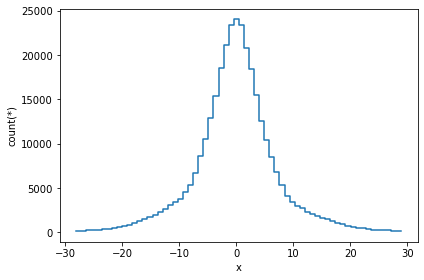

In [37]:
df.plot1d(df.x, 
          limits='99.7%')

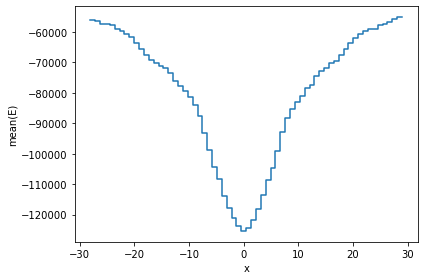

In [38]:
df.plot1d(df.x, 
          what='mean(E)', 
          limits='99.7%')

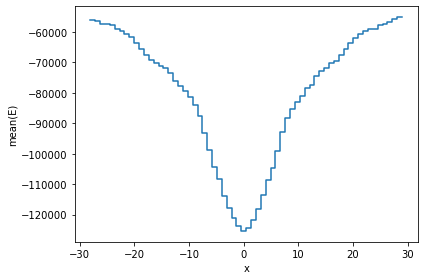

In [39]:
df.plot1d(df.x, 
          what=vaex.stat.mean(df.E), 
          limits='99.7%')

### 2d

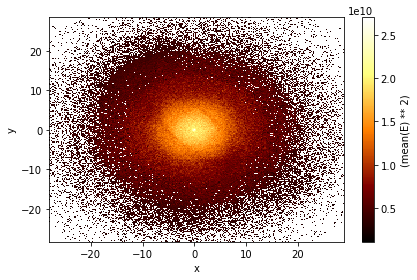

In [40]:
df.plot(df.x, df.y, 
        what=vaex.stat.mean(df.E)**2, 
        limits='99.7%')

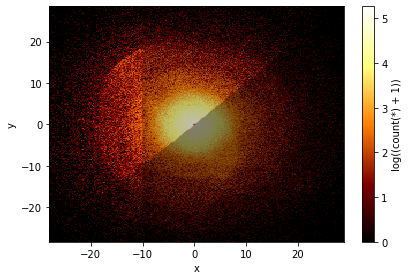

In [41]:
df.plot(df.x, df.y, 
        what = np.log(vaex.stat.count()+1), 
        limits = '99.7%', 
        selection = [None, df.x < df.y, df.x < -10])

/Users/boyuan/anaconda3/envs/sds/lib/python3.8/site-packages/vaex/viz/mpl.py:779: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = pylab.subplot(gs[row_offset + row * row_scale:row_offset + (row + 1) * row_scale, column * column_scale:(column + 1) * column_scale])


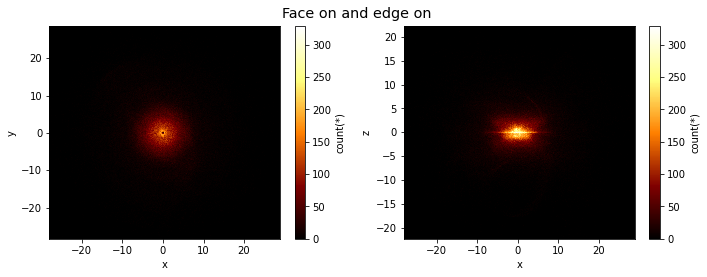

In [42]:
df.plot([['x','y'], ['x','z']],
        limits = '99.7%',
        title = 'Face on and edge on',
        figsize = (10,4))

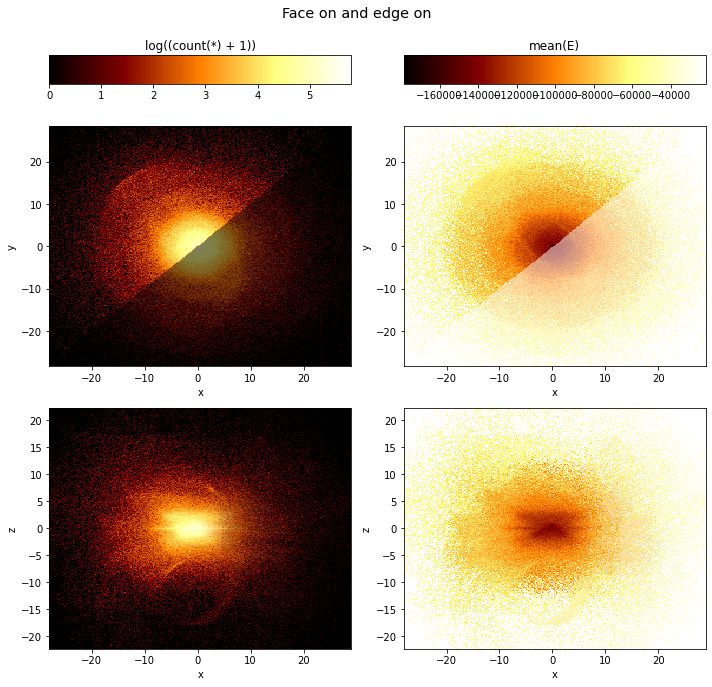

In [43]:
df.plot([['x','y'],['x','z']],
        limits = '99.7%',
        what = [np.log(vaex.stat.count()+1), vaex.stat.mean(df.E)],
        selection = [None, df.x < df.y],
        title = 'Face on and edge on',
        figsize = (10,10))

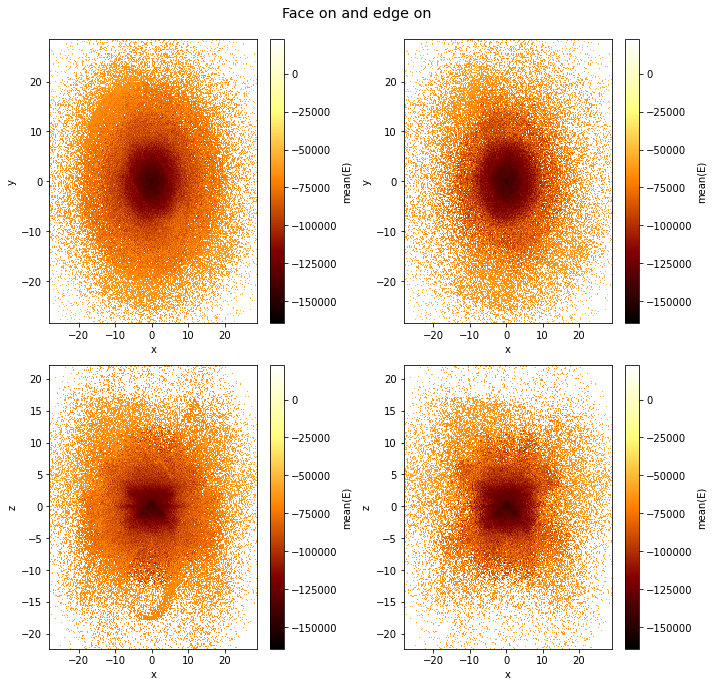

In [44]:
df.plot([["x", "y"], ["x", "z"]],
        limits='99.7%',
        what=vaex.stat.mean(df.E),
        selection=[None, df.Lz < 0],
        visual=dict(column='selection'),
        title="Face on and edge on", figsize=(10,10))

### 3d

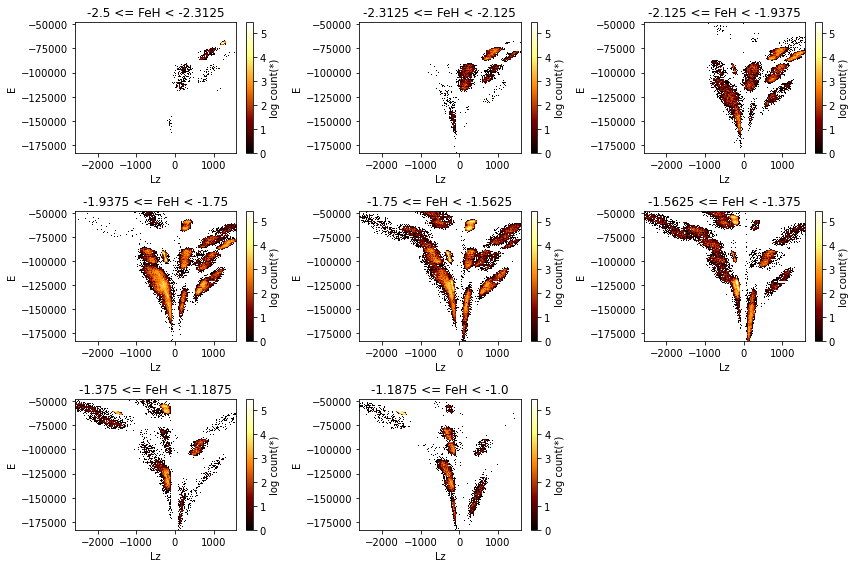

In [45]:
df.plot("Lz", "E",
        limits = '99.7%',
        z = "FeH:-2.5,-1,8", 
        show = True, 
        visual = dict(row = "z"),
        figsize = (12,8), 
        f = "log", 
        wrap_columns = 3)

### Plot with selection

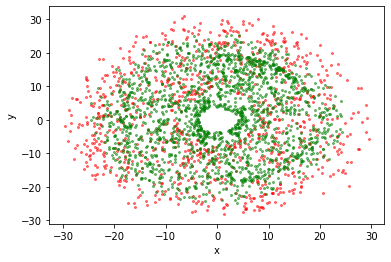

In [46]:
df.scatter(df.x, df.y, selection=df.Lz < -2500, c="red", alpha=0.5, s=4)
df.scatter(df.x, df.y, selection=df.Lz > 1500, c="green", alpha=0.5, s=4)

### Plot with matplotlib

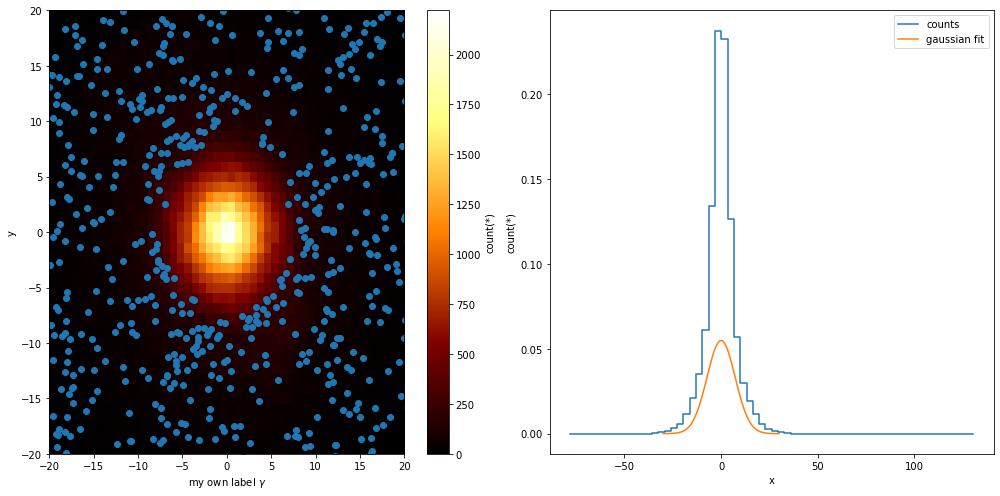

In [47]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
plt.sca(ax1)
selection = df.Lz < -2500
x = df[selection].x.evaluate()#selection=selection)
y = df[selection].y.evaluate()#selection=selection)
df.plot(df.x, df.y)
plt.scatter(x, y)
plt.xlabel('my own label $\gamma$')
plt.xlim(-20, 20)
plt.ylim(-20, 20)

plt.sca(ax2)
df.plot1d(df.x, label='counts', n=True)
x = np.linspace(-30, 30, 100)
std = df.std(df.x.expression)
y = np.exp(-(x**2/std**2/2)) / np.sqrt(2*np.pi) / std
plt.plot(x, y, label='gaussian fit')
plt.legend()
plt.show()

### Interactive

In [48]:
import vaex.jupyter
import pylab as plt

In [49]:
df.select(df.x > 0)
@vaex.jupyter.interactive_selection(df)
def plot(*args, **kwargs):
    print("Mean x for the selection is:", df.mean(df.x, selection=True))
    df.plot(df.x, df.y, what=np.log(vaex.stat.count()+1), selection=[None, True], limits='99.7%')
    plt.show()

Output()

## 1.3 Machine learning

In [50]:
import vaex.ml

In [51]:
df = vaex.ml.datasets.load_iris()
df

#,sepal_length,sepal_width,petal_length,petal_width,class_
0,5.9,3.0,4.2,1.5,1
1,6.1,3.0,4.6,1.4,1
2,6.6,2.9,4.6,1.3,1
3,6.7,3.3,5.7,2.1,2
4,5.5,4.2,1.4,0.2,0
...,...,...,...,...,...
145,5.2,3.4,1.4,0.2,0
146,5.1,3.8,1.6,0.2,0
147,5.8,2.6,4.0,1.2,1
148,5.7,3.8,1.7,0.3,0


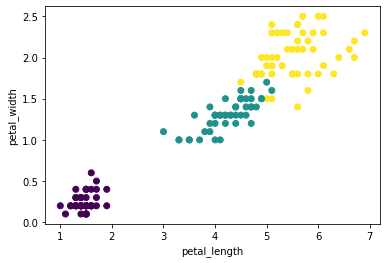

In [52]:
df.scatter(df.petal_length, df.petal_width, c_expr = df.class_)

### Preprocessing

In [53]:
features = ['petal_length','petal_width','sepal_length','sepal_width']
scaler = vaex.ml.StandardScaler(features = features, prefix = 'scaled_')
scaler.fit(df)
df_trans = scaler.transform(df)
df_trans

#,sepal_length,sepal_width,petal_length,petal_width,class_,scaled_petal_length,scaled_petal_width,scaled_sepal_length,scaled_sepal_width
0,5.9,3.0,4.2,1.5,1,0.25096730693923325,0.39617188299171285,0.06866179325140277,-0.12495760117130607
1,6.1,3.0,4.6,1.4,1,0.4784301228962429,0.26469891297233916,0.3109975341387059,-0.12495760117130607
2,6.6,2.9,4.6,1.3,1,0.4784301228962429,0.13322594295296575,0.9168368863569659,-0.3563605663033572
3,6.7,3.3,5.7,2.1,2,1.1039528667780207,1.1850097031079545,1.0380047568006185,0.5692512942248463
4,5.5,4.2,1.4,0.2,0,-1.341272404759837,-1.3129767272601438,-0.4160096885232057,2.6518779804133055
...,...,...,...,...,...,...,...,...,...
145,5.2,3.4,1.4,0.2,0,-1.341272404759837,-1.3129767272601438,-0.7795132998541615,0.8006542593568975
146,5.1,3.8,1.6,0.2,0,-1.2275409967813318,-1.3129767272601438,-0.9006811702978141,1.726266119885101
147,5.8,2.6,4.0,1.2,1,0.13723589896072813,0.0017529729335920385,-0.052506077192249874,-1.0505694616995096
148,5.7,3.8,1.7,0.3,0,-1.1706752927920796,-1.18150375724077,-0.17367394763590144,1.726266119885101


### Categoricals

In [54]:
df = vaex.ml.datasets.load_titanic()
df

#,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,nan,"St Louis, MO"
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,nan,"Montreal, PQ / Chesterville, ON"
2,1,False,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,None,nan,"Montreal, PQ / Chesterville, ON"
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON"
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,None,nan,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,304",3,False,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,None,C,None,328.0,None
"1,305",3,False,"Zabour, Miss. Thamine",female,nan,1,0,2665,14.4542,None,C,None,nan,None
"1,306",3,False,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,None,C,None,304.0,None
"1,307",3,False,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,None,C,None,nan,None


In [55]:
label_encoder = vaex.ml.LabelEncoder(features=['embarked'])
one_hot_encoder = vaex.ml.OneHotEncoder(features=['embarked'])
freq_encoder = vaex.ml.FrequencyEncoder(features=['embarked'])
bayes_encoder = vaex.ml.BayesianTargetEncoder(features=['embarked'], target='survived')
woe_encoder = vaex.ml.WeightOfEvidenceEncoder(features=['embarked'], target='survived')

df = label_encoder.fit_transform(df)
df = one_hot_encoder.fit_transform(df)
df = freq_encoder.fit_transform(df)
df = bayes_encoder.fit_transform(df)
df = woe_encoder.fit_transform(df)
df

INFO:MainThread:numexpr.utils:NumExpr defaulting to 8 threads.


#,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home_dest,label_encoded_embarked,embarked_0.0,embarked_C,embarked_Q,embarked_S,frequency_encoded_embarked,mean_encoded_embarked,woe_encoded_embarked
0,1,True,"Allen, Miss. Elisabeth Walton",female,29.0,0,0,24160,211.3375,B5,S,2,nan,"St Louis, MO",1,0,0,0,1,0.6982429335370511,0.33747248226886234,-0.6964312557611353
1,1,True,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,nan,"Montreal, PQ / Chesterville, ON",1,0,0,0,1,0.6982429335370511,0.33747248226886234,-0.6964312557611353
2,1,False,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.55,C22 C26,S,None,nan,"Montreal, PQ / Chesterville, ON",1,0,0,0,1,0.6982429335370511,0.33747248226886234,-0.6964312557611353
3,1,False,"Allison, Mr. Hudson Joshua Creighton",male,30.0,1,2,113781,151.55,C22 C26,S,None,135.0,"Montreal, PQ / Chesterville, ON",1,0,0,0,1,0.6982429335370511,0.33747248226886234,-0.6964312557611353
4,1,False,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.55,C22 C26,S,None,nan,"Montreal, PQ / Chesterville, ON",1,0,0,0,1,0.6982429335370511,0.33747248226886234,-0.6964312557611353
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,304",3,False,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,None,C,None,328.0,None,2,0,1,0,0,0.20626432391138275,0.5086408027584498,0.22314355131420993
"1,305",3,False,"Zabour, Miss. Thamine",female,nan,1,0,2665,14.4542,None,C,None,nan,None,2,0,1,0,0,0.20626432391138275,0.5086408027584498,0.22314355131420993
"1,306",3,False,"Zakarian, Mr. Mapriededer",male,26.5,0,0,2656,7.225,None,C,None,304.0,None,2,0,1,0,0,0.20626432391138275,0.5086408027584498,0.22314355131420993
"1,307",3,False,"Zakarian, Mr. Ortin",male,27.0,0,0,2670,7.225,None,C,None,nan,None,2,0,1,0,0,0.20626432391138275,0.5086408027584498,0.22314355131420993


### Dimensionality reduction - PCA

In [56]:
df = vaex.ml.datasets.load_iris_1e9()
n_samples = len(df)
print(f'Number of samples in DataFrame: {n_samples:,}')

Number of samples in DataFrame: 1,005,000,000


In [57]:
features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
pca = vaex.ml.PCA(features=features, n_components=4, progress=True)
pca.fit(df)

[########################################] 100.00% elapsed time  :    53.68s =  0.9m =  0.0h
[########################################] 100.00% elapsed time  :    40.48s =  0.7m =  0.0h     
 

In [59]:
df_trans = pca.transform(df)
df_trans

#,sepal_length,sepal_width,petal_length,petal_width,class_,PCA_0,PCA_1,PCA_2,PCA_3
0,5.9,3.0,4.2,1.5,1,-0.5124911650828933,0.10136130026254939,0.13184472681946177,-0.0536052519663435
1,6.1,3.0,4.6,1.4,1,-0.8916707968135663,0.03301244465442124,-0.005279721632027355,0.15315094855621578
2,6.6,2.9,4.6,1.3,1,-1.0449202179884562,-0.23115418873408528,-0.41205557129910236,0.04701889476767881
3,6.7,3.3,5.7,2.1,2,-2.277291593107675,-0.33339882921003183,0.2884675720174431,0.05563010598437092
4,5.5,4.2,1.4,0.2,0,2.5955809212374428,-1.1008728741963318,0.16905585054226457,0.09850072513784291
...,...,...,...,...,...,...,...,...,...
"1,004,999,995",5.2,3.4,1.4,0.2,0,2.6383023378183865,-0.32139321913882346,-0.13969210721565256,-0.06043651561164683
"1,004,999,996",5.1,3.8,1.6,0.2,0,2.5360375158514996,-0.5109726863119697,0.17782862326253962,0.19012708416099022
"1,004,999,997",5.8,2.6,4.0,1.2,0,-0.23035191563556012,0.4003558410123802,-0.22797987450996354,-0.014541652526280285
"1,004,999,998",5.7,3.8,1.7,0.3,0,2.197485640402041,-0.8811268074722001,-0.11232297421856396,-0.020064744169505905


### Clustering - Kmeans

In [60]:
import vaex.ml.cluster

df = vaex.ml.datasets.load_iris()

features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
kmeans = vaex.ml.cluster.KMeans(features=features, n_clusters=3, max_iter=100, verbose=True, random_state=42)
kmeans.fit(df)

df_trans = kmeans.transform(df)
df_trans

Iteration    0, inertia  519.0500000000001
Iteration    1, inertia  156.70447116074328
Iteration    2, inertia  88.70688235734133
Iteration    3, inertia  80.23054939305554
Iteration    4, inertia  79.28654263977778
Iteration    5, inertia  78.94084142614601
Iteration    6, inertia  78.94084142614601


#,sepal_length,sepal_width,petal_length,petal_width,class_,prediction_kmeans
0,5.9,3.0,4.2,1.5,1,0
1,6.1,3.0,4.6,1.4,1,0
2,6.6,2.9,4.6,1.3,1,0
3,6.7,3.3,5.7,2.1,2,1
4,5.5,4.2,1.4,0.2,0,2
...,...,...,...,...,...,...
145,5.2,3.4,1.4,0.2,0,2
146,5.1,3.8,1.6,0.2,0,2
147,5.8,2.6,4.0,1.2,1,0
148,5.7,3.8,1.7,0.3,0,2


In [61]:
df_trans['predicted_kmean_map'] = df_trans.prediction_kmeans.map(mapper={0: 1, 1: 2, 2: 0})
df_trans

#,sepal_length,sepal_width,petal_length,petal_width,class_,prediction_kmeans,predicted_kmean_map
0,5.9,3.0,4.2,1.5,1,0,1
1,6.1,3.0,4.6,1.4,1,0,1
2,6.6,2.9,4.6,1.3,1,0,1
3,6.7,3.3,5.7,2.1,2,1,2
4,5.5,4.2,1.4,0.2,0,2,0
...,...,...,...,...,...,...,...
145,5.2,3.4,1.4,0.2,0,2,0
146,5.1,3.8,1.6,0.2,0,2,0
147,5.8,2.6,4.0,1.2,1,0,1
148,5.7,3.8,1.7,0.3,0,2,0


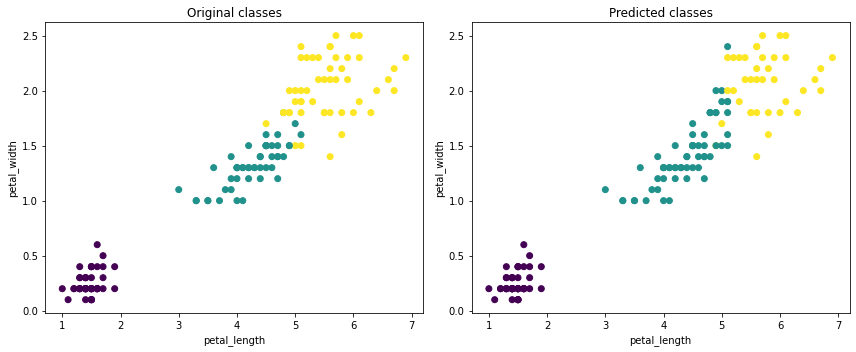

In [62]:
fig = plt.figure(figsize=(12, 5))

plt.subplot(121)
df_trans.scatter(df_trans.petal_length, df_trans.petal_width, c_expr=df_trans.class_)
plt.title('Original classes')

plt.subplot(122)
df_trans.scatter(df_trans.petal_length, df_trans.petal_width, c_expr=df_trans.predicted_kmean_map)
plt.title('Predicted classes')

plt.tight_layout()
plt.show()

In [63]:
df = vaex.ml.datasets.load_iris_1e9()
n_samples = len(df)
print(f'Number of samples in DataFrame: {n_samples:,}')

Number of samples in DataFrame: 1,005,000,000


In [64]:
%%time

features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
kmeans = vaex.ml.cluster.KMeans(features=features, n_clusters=3, max_iter=100, verbose=True, random_state=31)
kmeans.fit(df)

Iteration    0, inertia  851276060.5436637
Iteration    1, inertia  547273077.3739978
Iteration    2, inertia  541543092.1032534
Iteration    3, inertia  540282202.5700842
Iteration    4, inertia  540282200.6972677
Iteration    5, inertia  540282200.6972537
CPU times: user 4min 10s, sys: 3min 13s, total: 7min 23s
Wall time: 3min 37s


### Supervised learning

In [65]:
from vaex.ml.sklearn import Predictor
from sklearn.ensemble import GradientBoostingClassifier

df = vaex.ml.datasets.load_iris()

features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
target = 'class_'

model = GradientBoostingClassifier(random_state = 42)
vaex_model = Predictor(features = features, target = target, model = model, prediction_name = 'prediction')

vaex_model.fit(df = df)

df = vaex_model.transform(df)
df

#,sepal_length,sepal_width,petal_length,petal_width,class_,prediction
0,5.9,3.0,4.2,1.5,1,1
1,6.1,3.0,4.6,1.4,1,1
2,6.6,2.9,4.6,1.3,1,1
3,6.7,3.3,5.7,2.1,2,2
4,5.5,4.2,1.4,0.2,0,0
...,...,...,...,...,...,...
145,5.2,3.4,1.4,0.2,0,0
146,5.1,3.8,1.6,0.2,0,0
147,5.8,2.6,4.0,1.2,1,1
148,5.7,3.8,1.7,0.3,0,0


In [66]:
from vaex.ml.sklearn import IncrementalPredictor
from sklearn.linear_model import SGDClassifier

df = vaex.ml.datasets.load_iris_1e9()

features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
target = 'class_'

model = SGDClassifier(learning_rate='constant', eta0=0.0001, random_state=42)
vaex_model = IncrementalPredictor(features=features, target=target, model=model,
                                  batch_size=11_000_000, partial_fit_kwargs={'classes':[0, 1, 2]})

vaex_model.fit(df=df, progress='widget')

df = vaex_model.transform(df)
df

#,sepal_length,sepal_width,petal_length,petal_width,class_,prediction
0,5.9,3.0,4.2,1.5,1,0
1,6.1,3.0,4.6,1.4,1,0
2,6.6,2.9,4.6,1.3,1,0
3,6.7,3.3,5.7,2.1,2,0
4,5.5,4.2,1.4,0.2,0,0
...,...,...,...,...,...,...
"1,004,999,995",5.2,3.4,1.4,0.2,0,0
"1,004,999,996",5.1,3.8,1.6,0.2,0,0
"1,004,999,997",5.8,2.6,4.0,1.2,0,0
"1,004,999,998",5.7,3.8,1.7,0.3,0,0


In [67]:
from vaex.ml.xgboost import XGBoostModel

df = vaex.ml.datasets.load_iris_1e5()
df_train, df_test = df.ml.train_test_split(test_size=0.2, verbose=False)

features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width']
target = 'class_'

params = {'learning_rate': 0.1,
          'max_depth': 3,
          'num_class': 3,
          'objective': 'multi:softmax',
          'subsample': 1,
          'random_state': 42,
          'n_jobs': -1}


booster = XGBoostModel(features=features, target=target, num_boost_round=500, params=params)
booster.fit(df=df_train, evals=[(df_train, 'train'), (df_test, 'test')], early_stopping_rounds=5)

df_test = booster.transform(df_train)
df_test

#,sepal_length,sepal_width,petal_length,petal_width,class_,xgboost_prediction
0,5.9,3.0,4.2,1.5,1,1.0
1,6.1,3.0,4.6,1.4,1,1.0
2,6.6,2.9,4.6,1.3,1,1.0
3,6.7,3.3,5.7,2.1,2,2.0
4,5.5,4.2,1.4,0.2,0,0.0
...,...,...,...,...,...,...
"80,395",5.2,3.4,1.4,0.2,0,0.0
"80,396",5.1,3.8,1.6,0.2,0,0.0
"80,397",5.8,2.6,4.0,1.2,1,1.0
"80,398",5.7,3.8,1.7,0.3,0,0.0


### State transfer

In [69]:
# Load data and split it in train and test sets
df = vaex.ml.datasets.load_iris()
df_train, df_test = df.ml.train_test_split(test_size=0.2, verbose=False)

# Create new features
df_train['petal_ratio'] = df_train.petal_length / df_train.petal_width
df_train['sepal_ratio'] = df_train.sepal_length / df_train.sepal_width

# Do a PCA transformation
features = ['petal_length', 'petal_width', 'sepal_length', 'sepal_width', 'petal_ratio', 'sepal_ratio']
pca = vaex.ml.PCA(features=features, n_components=6)
df_train = pca.fit_transform(df_train)

# Display the training DataFrame at this stage
df_train

#,sepal_length,sepal_width,petal_length,petal_width,class_,petal_ratio,sepal_ratio,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5
0,5.4,3.0,4.5,1.5,1,3.0,1.8,-1.510547480171215,0.36115243211268194,-0.4005106138591806,0.5491844107628989,0.21135370342329568,-0.00954224322485328
1,4.8,3.4,1.6,0.2,0,8.0,1.411764705882353,4.447550641536847,0.27996447304875843,-0.04904458661276906,0.18719360579644712,0.10928493945448657,0.005228919010020705
2,6.9,3.1,4.9,1.5,1,3.266666666666667,2.2258064516129035,-1.777649528149752,-0.6082889770845892,0.4800783355065151,-0.37762011866831346,0.051744727018939916,-0.04673816474220885
3,4.4,3.2,1.3,0.2,0,6.5,1.375,3.400548263702555,1.4370369285918456,-0.3662652846960039,0.2342083619844194,0.0575002148163424,-0.023055011653266677
4,5.6,2.8,4.9,2.0,2,2.45,2.0,-2.3245098766222094,0.14710673877401315,-0.5150809942258254,0.54718243914263,-0.12154714382375903,0.004468619753212402
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5.2,3.4,1.4,0.2,0,6.999999999999999,1.5294117647058825,3.6237945832389524,0.8255759252729565,0.23453320686724854,-0.17599408825208826,-0.04687036865354195,-0.02424621891240758
116,5.1,3.8,1.6,0.2,0,8.0,1.3421052631578947,4.42115266246093,0.22287505533663743,0.44506428301797085,0.21844245577835614,0.14504752606375304,0.07229123907677343
117,5.8,2.6,4.0,1.2,1,3.3333333333333335,2.230769230769231,-1.069062832993727,0.38742583146543974,-0.44717677492367824,-0.2956609879568116,-0.0010695982441828802,-0.0065225306610742495
118,5.7,3.8,1.7,0.3,0,5.666666666666667,1.5000000000000002,2.2846521048417037,1.192082660968136,0.8273738848637023,-0.21048946462725737,0.03381892388998391,0.01879216527301375


In [74]:
import lightgbm

features = df_train.get_column_names(regex='^PCA')

booster = lightgbm.LGBMClassifier()

vaex_model = Predictor(model=booster, features=features, target='class_')

vaex_model.fit(df=df_train)
df_train = vaex_model.transform(df_train)

df_train

#,sepal_length,sepal_width,petal_length,petal_width,class_,petal_ratio,sepal_ratio,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,prediction
0,5.4,3.0,4.5,1.5,1,3.0,1.8,-1.510547480171215,0.36115243211268194,-0.4005106138591806,0.5491844107628989,0.21135370342329568,-0.00954224322485328,1
1,4.8,3.4,1.6,0.2,0,8.0,1.411764705882353,4.447550641536847,0.27996447304875843,-0.04904458661276906,0.18719360579644712,0.10928493945448657,0.005228919010020705,0
2,6.9,3.1,4.9,1.5,1,3.266666666666667,2.2258064516129035,-1.777649528149752,-0.6082889770845892,0.4800783355065151,-0.37762011866831346,0.051744727018939916,-0.04673816474220885,1
3,4.4,3.2,1.3,0.2,0,6.5,1.375,3.400548263702555,1.4370369285918456,-0.3662652846960039,0.2342083619844194,0.0575002148163424,-0.023055011653266677,0
4,5.6,2.8,4.9,2.0,2,2.45,2.0,-2.3245098766222094,0.14710673877401315,-0.5150809942258254,0.54718243914263,-0.12154714382375903,0.004468619753212402,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,5.2,3.4,1.4,0.2,0,6.999999999999999,1.5294117647058825,3.6237945832389524,0.8255759252729565,0.23453320686724854,-0.17599408825208826,-0.04687036865354195,-0.02424621891240758,0
116,5.1,3.8,1.6,0.2,0,8.0,1.3421052631578947,4.42115266246093,0.22287505533663743,0.44506428301797085,0.21844245577835614,0.14504752606375304,0.07229123907677343,0
117,5.8,2.6,4.0,1.2,1,3.3333333333333335,2.230769230769231,-1.069062832993727,0.38742583146543974,-0.44717677492367824,-0.2956609879568116,-0.0010695982441828802,-0.0065225306610742495,1
118,5.7,3.8,1.7,0.3,0,5.666666666666667,1.5000000000000002,2.2846521048417037,1.192082660968136,0.8273738848637023,-0.21048946462725737,0.03381892388998391,0.01879216527301375,0


In [75]:
state = df_train.state_get()

df_test.state_set(state)
df_test

#,sepal_length,sepal_width,petal_length,petal_width,class_,petal_ratio,sepal_ratio,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,prediction
0,5.9,3.0,4.2,1.5,1,2.8000000000000003,1.9666666666666668,-1.6426279404090718,0.49931302910747694,-0.06308800806664473,0.10842057110641687,-0.0392429866418927,-0.0273944397002731,1
1,6.1,3.0,4.6,1.4,1,3.2857142857142856,2.033333333333333,-1.445047446393471,-0.1019091578746505,-0.018990122394937782,0.02098076764609058,0.16142152766671447,-0.027166396379348395,1
2,6.6,2.9,4.6,1.3,1,3.538461538461538,2.2758620689655173,-1.330564613235537,-0.41978474749131267,0.17595905892906705,-0.46313019923084786,0.0830424368981539,-0.03335173367742855,1
3,6.7,3.3,5.7,2.1,2,2.7142857142857144,2.0303030303030303,-2.6719170661531013,-0.9149428897499293,0.4156162725009379,0.3463369266143665,0.0374296470759073,-0.013254286196245801,2
4,5.5,4.2,1.4,0.2,0,6.999999999999999,1.3095238095238095,3.63229302678314,0.8198526437905098,1.0462775793629382,0.09738737839850226,0.09412658096734107,0.13291370266975067,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,5.5,2.5,4.0,1.3,1,3.0769230769230766,2.2,-1.2523120088600896,0.5975071562677781,-0.7019801415469216,-0.11489031841855557,-0.03615945782087809,0.0054963218272649494,1
26,5.8,2.7,3.9,1.2,1,3.25,2.148148148148148,-1.0792352165904657,0.5236883751378522,-0.34037717939532297,-0.2374369502995512,-0.009368914220246098,-0.02184110533380823,1
27,4.4,2.9,1.4,0.2,0,6.999999999999999,1.517241379310345,3.742296919250609,1.0484603047419763,-0.6364755213152778,0.07623157913054102,0.00421535583331456,-0.06354157393133947,0
28,4.5,2.3,1.3,0.3,0,4.333333333333334,1.956521739130435,1.4537380535696471,2.4197864889383505,-1.0301500321688108,-0.5150263062576134,-0.2631218962099198,-0.06608059456656377,0


In [76]:
df_train.state_write('./iris_model.json')
df_test.state_load('./iris_model.json')
df_test

#,sepal_length,sepal_width,petal_length,petal_width,class_,petal_ratio,sepal_ratio,PCA_0,PCA_1,PCA_2,PCA_3,PCA_4,PCA_5,prediction
0,5.9,3.0,4.2,1.5,1,2.8000000000000003,1.9666666666666668,-1.6426279404090718,0.49931302910747694,-0.06308800806664473,0.10842057110641687,-0.0392429866418927,-0.0273944397002731,1
1,6.1,3.0,4.6,1.4,1,3.2857142857142856,2.033333333333333,-1.445047446393471,-0.1019091578746505,-0.018990122394937782,0.02098076764609058,0.16142152766671447,-0.027166396379348395,1
2,6.6,2.9,4.6,1.3,1,3.538461538461538,2.2758620689655173,-1.330564613235537,-0.41978474749131267,0.17595905892906705,-0.46313019923084786,0.0830424368981539,-0.03335173367742855,1
3,6.7,3.3,5.7,2.1,2,2.7142857142857144,2.0303030303030303,-2.6719170661531013,-0.9149428897499293,0.4156162725009379,0.3463369266143665,0.0374296470759073,-0.013254286196245801,2
4,5.5,4.2,1.4,0.2,0,6.999999999999999,1.3095238095238095,3.63229302678314,0.8198526437905098,1.0462775793629382,0.09738737839850226,0.09412658096734107,0.13291370266975067,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25,5.5,2.5,4.0,1.3,1,3.0769230769230766,2.2,-1.2523120088600896,0.5975071562677781,-0.7019801415469216,-0.11489031841855557,-0.03615945782087809,0.0054963218272649494,1
26,5.8,2.7,3.9,1.2,1,3.25,2.148148148148148,-1.0792352165904657,0.5236883751378522,-0.34037717939532297,-0.2374369502995512,-0.009368914220246098,-0.02184110533380823,1
27,4.4,2.9,1.4,0.2,0,6.999999999999999,1.517241379310345,3.742296919250609,1.0484603047419763,-0.6364755213152778,0.07623157913054102,0.00421535583331456,-0.06354157393133947,0
28,4.5,2.3,1.3,0.3,0,4.333333333333334,1.956521739130435,1.4537380535696471,2.4197864889383505,-1.0301500321688108,-0.5150263062576134,-0.2631218962099198,-0.06608059456656377,0


In [58]:
import dask 